In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


In [3]:
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
k_range = range(1, 31)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_scores.append(scores.mean())

cv_scores = np.array(cv_scores)

optimal_k = k_range[np.argmax(cv_scores)]
print(f"Optimal k based on 10-fold CV: {optimal_k}")


Optimal k based on 10-fold CV: 13


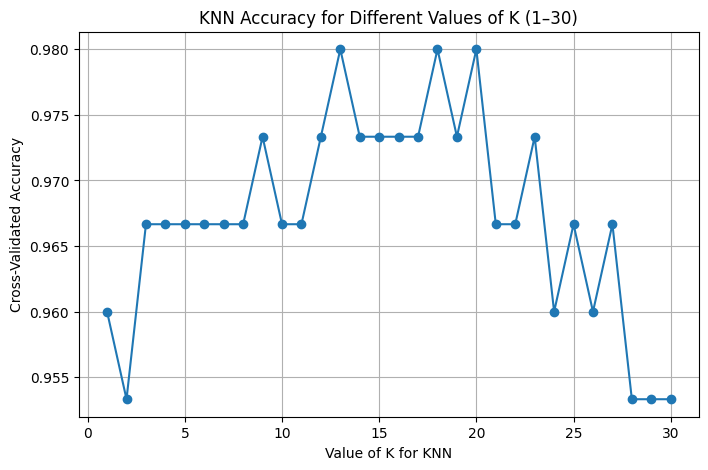

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different Values of K (1–30)')
plt.grid(True)
plt.show()


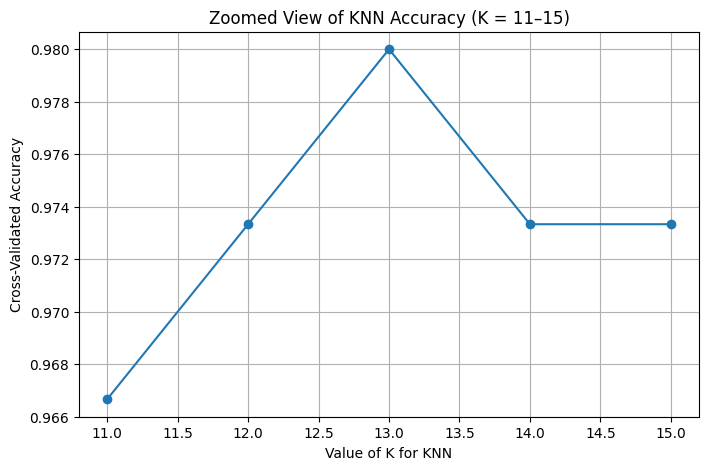

In [6]:
zoom_k = range(11, 16)
zoom_scores = cv_scores[10:15]

plt.figure(figsize=(8, 5))
plt.plot(zoom_k, zoom_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Zoomed View of KNN Accuracy (K = 11–15)')
plt.grid(True)
plt.show()


In [7]:
param_grid = {'n_neighbors': list(range(1, 31))}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X, y)

print("Best k from GridSearchCV:", grid.best_params_['n_neighbors'])
print("Best cross-validated accuracy:", grid.best_score_)


Best k from GridSearchCV: 13
Best cross-validated accuracy: 0.9800000000000001
